In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
count_pics = 0
def plot_scores( data_tmp, title="", scores=['ROC AUC', 'F1 score', 'Recall'], labels=None ):

    fig = plt.figure(figsize=(20,5))
    data_tmp = data_tmp.sort_values(by='Method').copy()
    
    plt.suptitle(f"Comparaison des scores pour les {title}")
    models = ['LogisticRegression', 'SupportVectorClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier', 'KNeighborsClassifier']
    if labels == None:
        labels = [ short_name for long_name in data_tmp.Method for short_name in models if short_name in long_name]

    num_scores = len(scores)
    for i, score in enumerate(scores):
        ax1 = plt.subplot(1,num_scores,i+1)
        sns.barplot(data=data_tmp, y='Method', x=score)
        plt.xlim([0, 1])
        plt.title(score)
        ax1.bar_label(ax1.containers[0])
        if (i==0):
            ax1.set_yticklabels(labels)
        else:
            ax1.axes.yaxis.set_visible(False)

    fig.tight_layout()

    #global count_pics
    #count_pics += 1
    #plt.savefig(f'Ressources/scores_{count_pics}.png', dpi=300, transparent=True)
    
    plt.show()

In [3]:
data_spot = pd.read_csv('data/scores.csv')
data_spot

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,TP,TN,FP,FN,Training time,Inference time
0,DummyClassifier,NaN,"{'random_state': [0], 'strategy': ['stratified']}",0.490519,0.078885,0.066578,0.844222,0.063939,0.069444,25,3774,366,335,1.268251,0.002057
1,Basic LogisticRegression,NaN,"{'random_state': [0], 'max_iter': [3000]}",0.734967,0.200277,0.005464,0.919111,0.166667,0.002778,1,4135,5,359,13.238042,0.025823
2,Basic LogisticRegression [w/thresholding],0.143,"{'random_state': [0], 'max_iter': [3000]}",0.734967,0.200277,0.282983,0.833333,0.215743,0.411111,148,3602,538,212,13.238042,0.013838
3,Basic DecisionTreeClassifier,NaN,{'random_state': [0]},0.538164,0.089958,0.150845,0.854889,0.141809,0.161111,58,3789,351,302,4.598010,0.018656
4,Basic DecisionTreeClassifier [w/thresholding],0.999,{'random_state': [0]},0.538164,0.089958,0.150845,0.854889,0.141809,0.161111,58,3789,351,302,4.598010,0.005793
5,Basic KNeighborsClassifier,NaN,{},0.554959,0.091506,0.005168,0.914444,0.037037,0.002778,1,4114,26,359,9.845080,6.625710
6,Basic KNeighborsClassifier [w/thresholding],0.200,{},0.554959,0.091506,0.166667,0.660000,0.103659,0.425000,153,2817,1323,207,9.845080,3.214133
7,Basic SupportVectorClassifier,NaN,{'random_state': [0]},0.651591,0.132524,0.000000,0.920000,0.000000,0.000000,0,4140,0,360,1489.974687,21.168804
8,Basic SupportVectorClassifier [w/thresholding],0.095,{'random_state': [0]},0.651591,0.132524,0.211679,0.760000,0.143564,0.402778,145,3275,865,215,1489.974687,9.443700
9,Basic RandomForestClassifier,NaN,{'random_state': [0]},0.677500,0.174049,0.000000,0.920000,0.000000,0.000000,0,4140,0,360,10.798586,0.123106


In [4]:
data_tuning = pd.read_csv('data/scores_tuning.csv')
data_tuning

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,Custom,TP,TN,FP,FN,Training time,Inference time
0,LogisticRegression [w/features],NaN,"[{'class_weight': ['balanced'], 'random_state'...",0.738159,0.208882,0.245868,0.675556,0.151015,0.661111,0.394562,238,2802,1338,122,160.147190,0.023115
1,LogisticRegression [w/threshold + features],0.627,"[{'class_weight': ['balanced'], 'random_state'...",0.738159,0.208882,0.277347,0.813556,0.200999,0.447222,0.359215,161,3500,640,199,160.147190,0.004282
2,XGBClassifier [w/features],NaN,"{'scale_pos_weight': [11.481644640234949], 'se...",0.721111,0.199894,0.239119,0.677556,0.147382,0.633333,0.381654,228,2821,1319,132,494.843943,0.032845
3,XGBClassifier [w/thresholding + features],0.633,"{'scale_pos_weight': [11.481644640234949], 'se...",0.721111,0.199894,0.260773,0.851333,0.216514,0.327778,0.297229,118,3713,427,242,494.843943,0.019873
4,LogisticRegression [w/features + nimp_selection],NaN,"[{'class_weight': ['balanced'], 'random_state'...",0.739334,0.210818,0.245902,0.672889,0.150754,0.666667,0.395778,240,2788,1352,120,133.146899,0.017281
5,LogisticRegression [w/threshold + features + n...,0.652,"[{'class_weight': ['balanced'], 'random_state'...",0.739334,0.210818,0.274621,0.829778,0.208333,0.402778,0.339419,145,3589,551,215,133.146899,0.006809
6,XGBClassifier [w/features + nimp_selection],NaN,"{'scale_pos_weight': [11.481644640234949], 'se...",0.721328,0.200543,0.237872,0.675333,0.146435,0.633333,0.380380,228,2811,1329,132,309.366424,0.028486
7,XGBClassifier [w/threshold + features + nimp_s...,0.639,"{'scale_pos_weight': [11.481644640234949], 'se...",0.721328,0.200543,0.264672,0.858000,0.225933,0.319444,0.295023,115,3746,394,245,309.366424,0.013765
8,LogisticRegression [w/features + custom_metric],NaN,"[{'class_weight': ['balanced'], 'random_state'...",0.741749,0.209763,0.249743,0.675556,0.153216,0.675000,0.401520,243,2797,1343,117,126.759251,0.010589
9,LogisticRegression [w/threshold + features + c...,0.528,"[{'class_weight': ['balanced'], 'random_state'...",0.741749,0.209763,0.257773,0.708222,0.161817,0.633333,0.400140,228,2959,1181,132,126.759251,0.015290


## Les modèles sans aucun ajustement

,Method,ROC AUC,Precision,Recall,F1 score
1,Basic LogisticRegression,0.734967,0.166667,0.002778,0.005464
3,Basic DecisionTreeClassifier,0.538164,0.141809,0.161111,0.150845
5,Basic KNeighborsClassifier,0.554959,0.037037,0.002778,0.005168
7,Basic SupportVectorClassifier,0.651591,0.000000,0.000000,0.000000
9,Basic RandomForestClassifier,0.677500,0.000000,0.000000,0.000000
11,Basic XGBClassifier,0.714562,0.302326,0.036111,0.064516


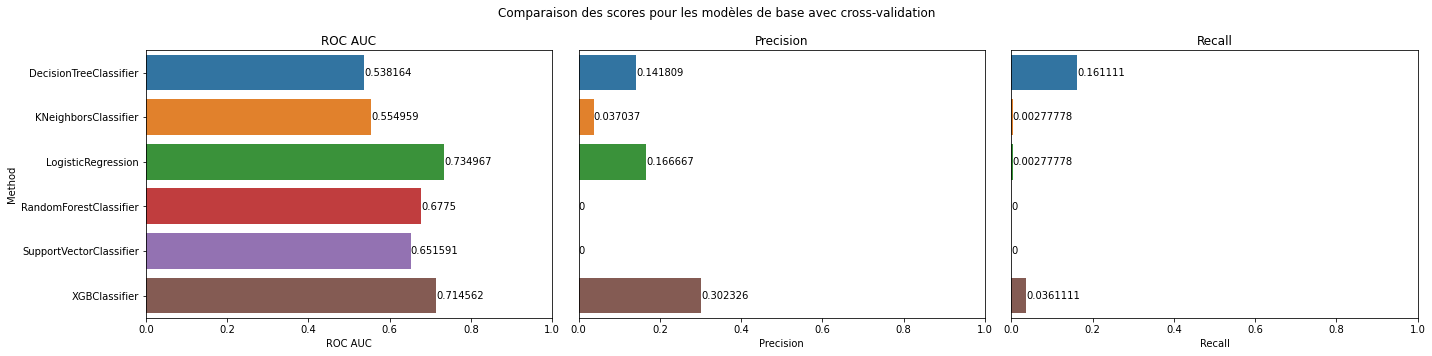

In [5]:
scores_graph = ['ROC AUC', 'Precision', 'Recall']
scores_tables = [*scores_graph, 'F1 score']

basic = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Basic')) ][['Method', *scores_tables]]
display(basic)
plot_scores( basic, "modèles de base avec cross-validation", scores_graph)

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv`

,Method,ROC AUC,Precision,Recall,F1 score
13,Grid LogisticRegression,0.733360,0.000000,0.000000,0.00000
15,Grid DecisionTreeClassifier,0.659583,0.222222,0.005556,0.01084
17,Grid KNeighborsClassifier,0.613380,0.000000,0.000000,0.00000
19,Grid RandomForestClassifier,0.706875,0.000000,0.000000,0.00000
21,Grid XGBClassifier,0.731411,0.384615,0.013889,0.02681


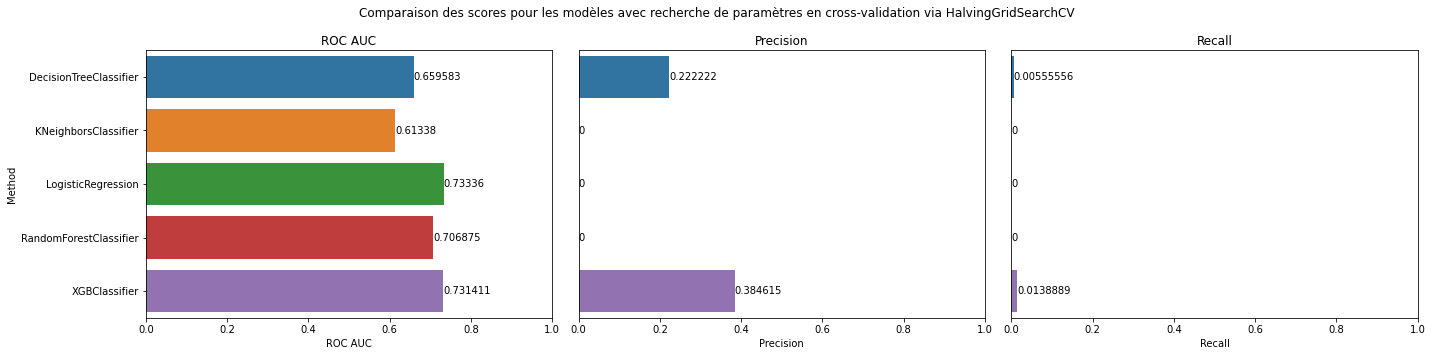

In [6]:
grid = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Grid')) ][['Method', *scores_tables]]
grid_t = data_spot[ (data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Grid')) ][['Method', *scores_tables]]
display(grid)
plot_scores( grid, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV", scores_graph )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` 

,Method,ROC AUC,Precision,Recall,F1 score
23,Balanced LogisticRegression,0.732390,0.147541,0.650000,0.240493
25,Balanced DecisionTreeClassifier,0.675722,0.135827,0.575000,0.219745
27,Balanced RandomForestClassifier,0.713973,0.149355,0.611111,0.240044
29,Balanced XGBClassifier,0.721245,0.146139,0.636111,0.237675


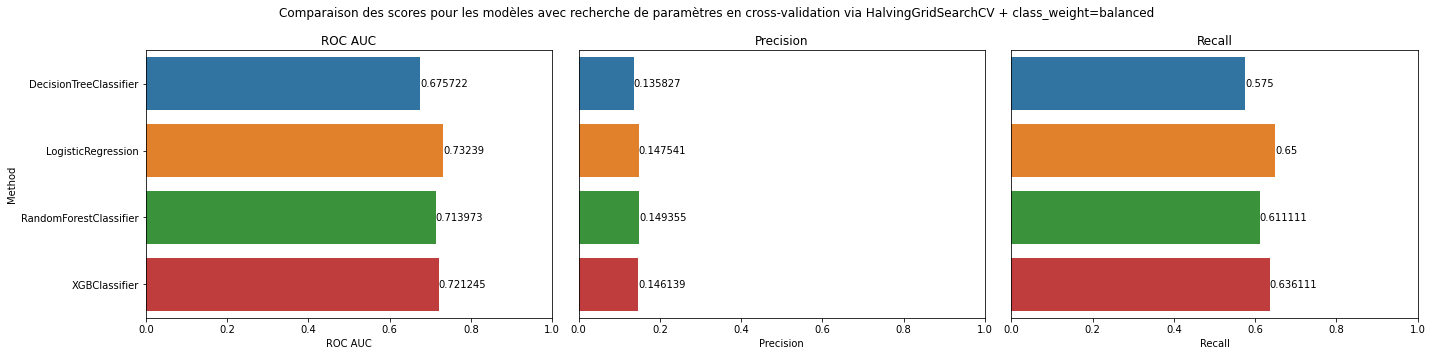

In [7]:
balanced = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Balanced')) & ~(data_spot.Method.str.contains('features'))][['Method', *scores_tables]]
balanced_t = data_spot[ (data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Balanced')) & ~(data_spot.Method.str.contains('features'))][['Method', *scores_tables]]
display(balanced)
plot_scores( balanced, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced", scores_graph )

,Method,ROC AUC,Precision,Recall,F1 score
31,SMOT LogisticRegression,0.717114,0.147952,0.622222,0.239061
33,SMOT DecisionTreeClassifier,0.640151,0.130173,0.480556,0.204855
35,SMOT KNeighborsClassifier,0.568660,0.097971,0.550000,0.166317
37,SMOT RandomForestClassifier,0.667444,0.203846,0.147222,0.170968
39,SMOT XGBClassifier,0.716994,0.481481,0.036111,0.067183


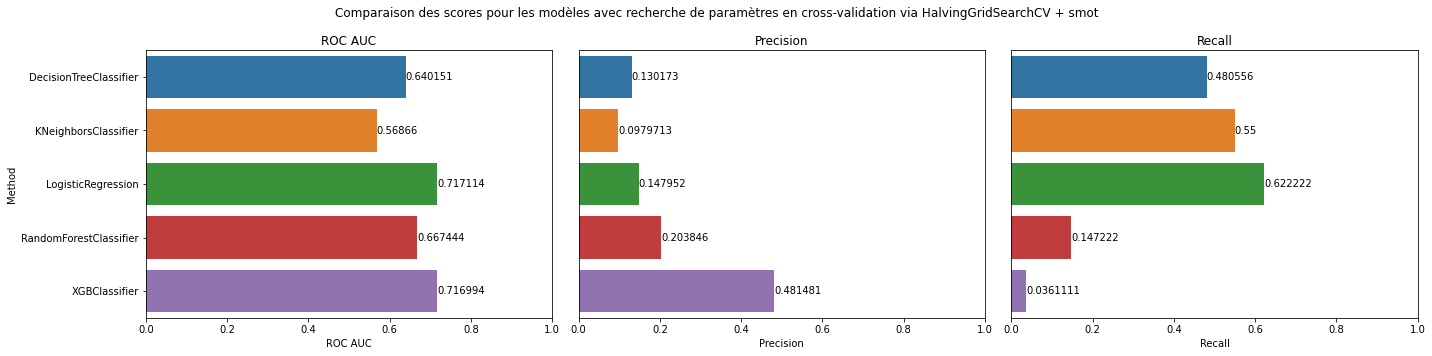

In [8]:
smot = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('SMOT')) & ~(data_spot.Method.str.contains('features'))][['Method', *scores_tables]]
smot_t = data_spot[ (data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('SMOT')) & ~(data_spot.Method.str.contains('features'))][['Method', *scores_tables]]
display(smot)
plot_scores( smot, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + smot", scores_graph )

>#### A ce stade les deux meilleurs modèles sur la base du ROC AUC score, sont :
> - `Balanced LogisticRegression` *(0.730879)* 
> - `Balanced XGBClassifier` *(0.722080)*.

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features`

,Method,Custom,ROC AUC,Precision,Recall,F1 score
0,LogisticRegression [w/features],0.394562,0.738159,0.151015,0.661111,0.245868
2,XGBClassifier [w/features],0.381654,0.721111,0.147382,0.633333,0.239119


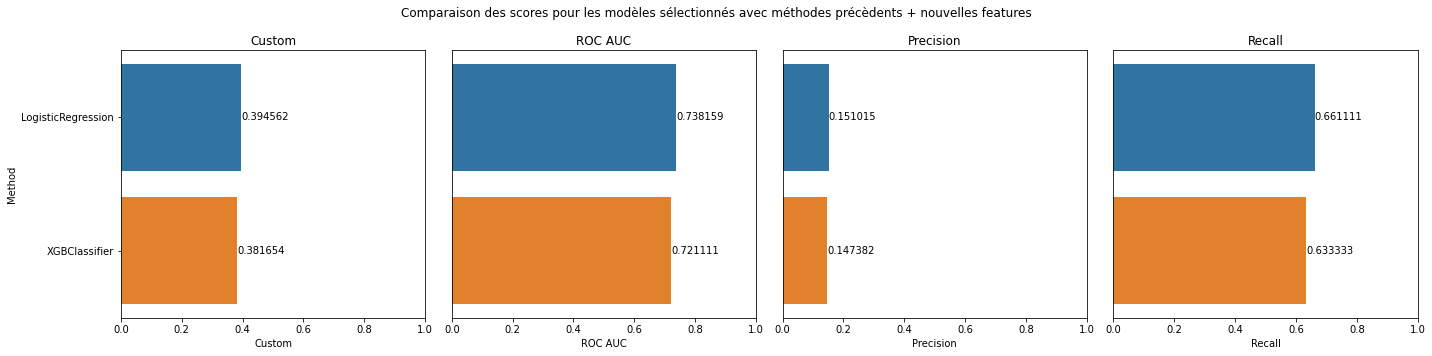

In [9]:
scores_graph = ['Custom', 'ROC AUC', 'Precision', 'Recall']
scores_tables = [*scores_graph, 'F1 score']

extrafeatures = data_tuning[ ~(data_tuning.Method.str.contains('threshold|custom|nimp|rec')) & (data_tuning.Method.str.contains('[w/features]'))][['Method', *scores_tables]]
display(extrafeatures)
plot_scores( extrafeatures, "modèles sélectionnés avec méthodes précèdents + nouvelles features", scores_graph)

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features` + `feature selection`

,Method,Custom,ROC AUC,Precision,Recall,F1 score
4,LogisticRegression [w/features + nimp_selection],0.395778,0.739334,0.150754,0.666667,0.245902
6,XGBClassifier [w/features + nimp_selection],0.380380,0.721328,0.146435,0.633333,0.237872


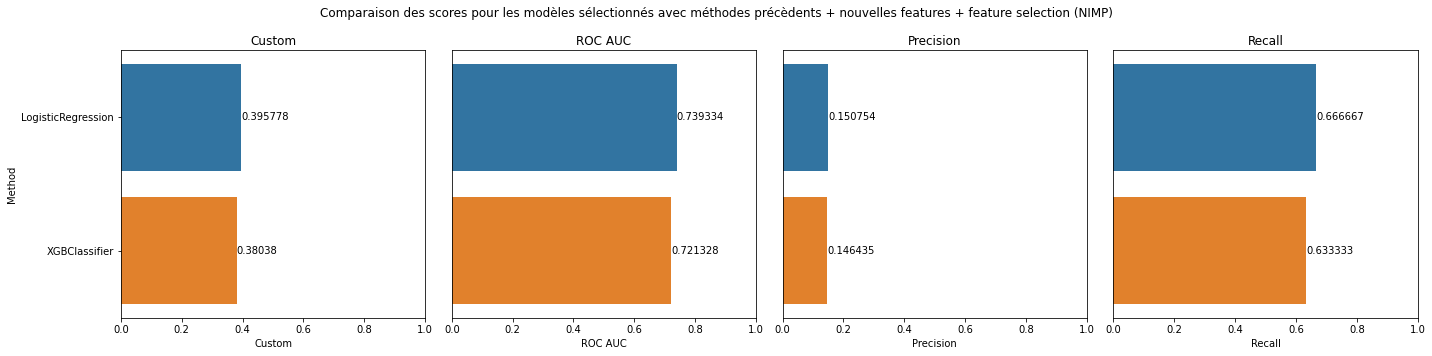

In [10]:
fselection2 = data_tuning[~(data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('nimp'))][['Method', *scores_tables]]
display(fselection2)
plot_scores( fselection2, "modèles sélectionnés avec méthodes précèdents + nouvelles features + feature selection (NIMP)", scores_graph )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features` + `feature selection` + `custom metric (Fbeta)`

,Method,Custom,ROC AUC,Precision,Recall,F1 score
8,LogisticRegression [w/features + custom_metric],0.40152,0.741749,0.153216,0.675000,0.249743
10,XGBClassifier [w/features + custom_metric],0.38038,0.721328,0.146435,0.633333,0.237872


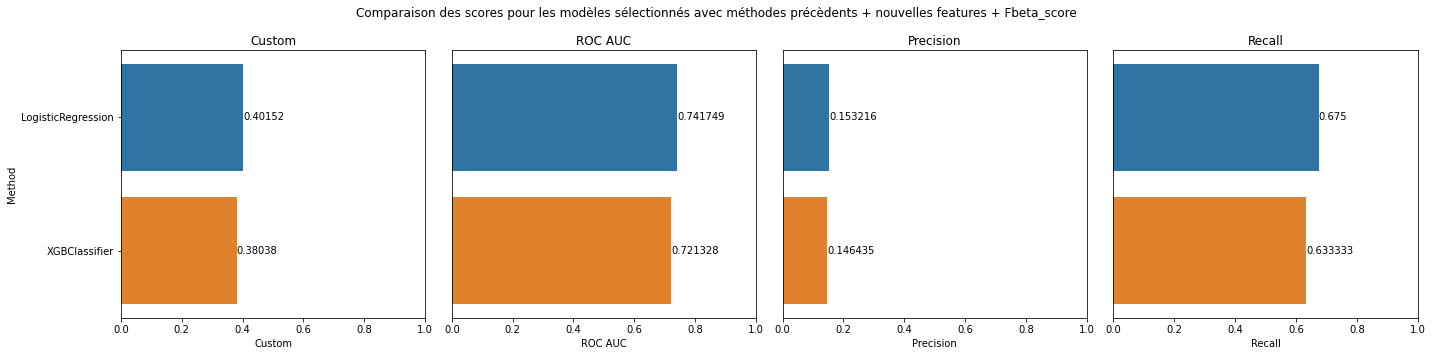

In [11]:
fbeta2 = data_tuning[~(data_tuning.Method.str.contains('threshold|Final')) & (data_tuning.Method.str.contains('custom'))][['Method', *scores_tables]]
display(fbeta2)
plot_scores( fbeta2, "modèles sélectionnés avec méthodes précèdents + nouvelles features + Fbeta_score", scores_graph )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features` + `feature selection` + `custom metric (Fbeta)` + `seuillage`

,Method,Custom,ROC AUC,Precision,Recall,F1 score
9,LogisticRegression [w/threshold + features + c...,0.400140,0.741749,0.161817,0.633333,0.257773
11,XGBClassifier [w/threshold + features + custom...,0.383572,0.721328,0.173532,0.550000,0.263824


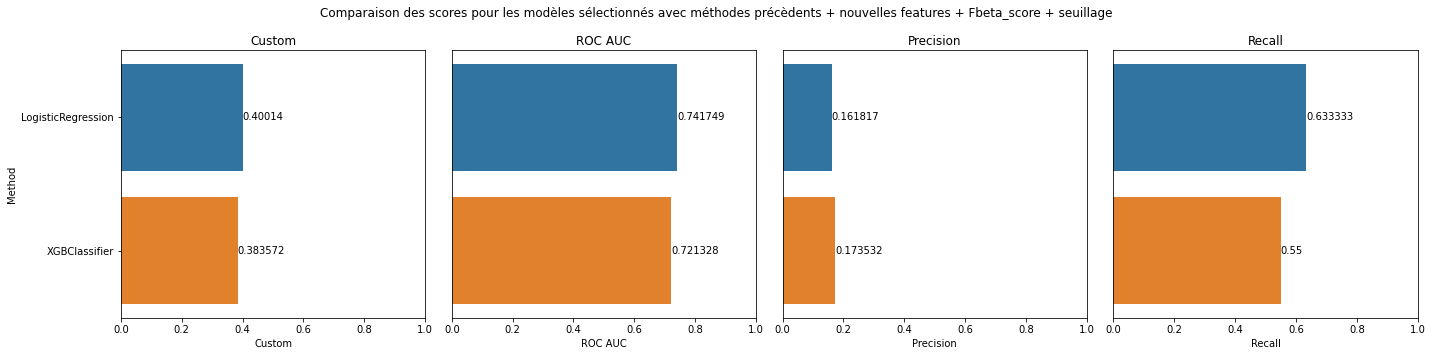

In [12]:
fbeta2_t = data_tuning[ ~(data_tuning.Method.str.contains('Final')) & (data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('custom'))][['Method', *scores_tables]]
display(fbeta2_t)
plot_scores( fbeta2_t, "modèles sélectionnés avec méthodes précèdents + nouvelles features + Fbeta_score + seuillage", scores_graph)

## Le meilleur modèle ré-entrainé et testé sur un dataset complet

,Method,Custom,ROC AUC,Precision,Recall,F1 score
12,Final LogisticRegression [w/features + custom_...,0.421871,0.755910,0.164098,0.694683,0.265483
14,Final LogisticRegression [w/features + custom_...,0.425462,0.757431,0.166039,0.698174,0.268276


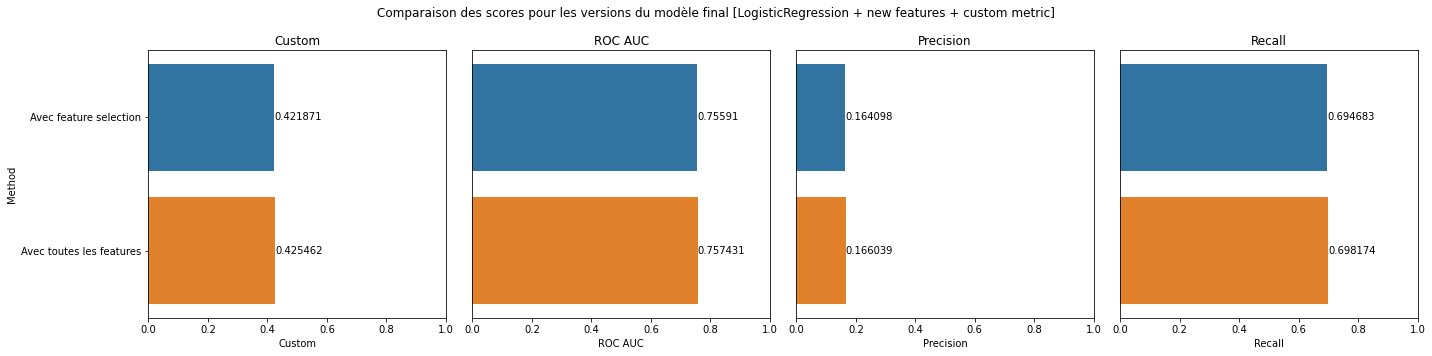

In [13]:
final = data_tuning[~(data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('Final'))][['Method', *scores_tables]]
display(final)
plot_scores(final, "versions du modèle final [LogisticRegression + new features + custom metric]", scores_graph, labels = ['Avec feature selection', 'Avec toutes les features'] )

,Method,Custom,ROC AUC,Precision,Recall,F1 score
13,Final LogisticRegression [w/threshold + featur...,0.421871,0.755910,0.164098,0.694683,0.265483
15,Final LogisticRegression [w/threshold + featur...,0.423992,0.757431,0.168556,0.682599,0.270354


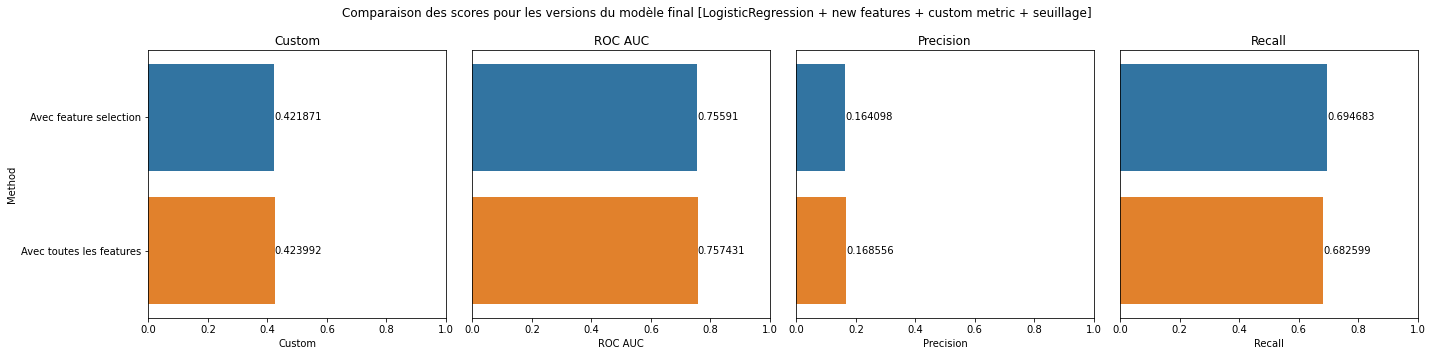

In [14]:
final_t = data_tuning[(data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('Final'))][['Method', *scores_tables]]
display(final_t)
plot_scores(final_t, "versions du modèle final [LogisticRegression + new features + custom metric + seuillage]", scores_graph, labels = ['Avec feature selection', 'Avec toutes les features'] )